## Data Loading

In [8]:
import os
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *
from models import *
from constants import *

In [9]:
df_all = pd.read_pickle(open(DATA_PATH + '/unfiltered/full.pkl','rb'))
df_healthy = pd.read_pickle(open(DATA_PATH + '/cleaned/full.pkl','rb'))

In [10]:
for c in df_healthy.columns:print(c)

Date.time
Wind.dir.std
Power.me
Power.sd
Power.min
Power.max
Pot.Power.me
Wind.speed.me
Wind.speed.sd
Wind.speed.min
Wind.speed.max
Power.factor.cosphi.me
Power.factor.cosphi.sd
Power.factor.cosphi.min
Power.factor.cosphi.max
Front.bearing.temp.me
Front.bearing.temp.sd
Front.bearing.temp.min
Front.bearing.temp.max
Rear.bearing.temp.me
Rear.bearing.temp.sd
Rear.bearing.temp.min
Rear.bearing.temp.max
Stator1.temp.me
Stator1.temp.sd
Stator1.temp.min
Stator1.temp.max
Nacelle.ambient.temp.me
Nacelle.ambient.temp.sd
Nacelle.ambient.temp.min
Nacelle.ambient.temp.max
Nacelle.temp.me
Nacelle.temp.sd
Nacelle.temp.min
Nacelle.temp.max
Transformer.temp.me
Transformer.temp.sd
Transformer.temp.min
Transformer.temp.max
Gear.oil.inlet.temp.me
Gear.oil.inlet.temp.sd
Gear.oil.inlet.temp.min
Gear.oil.inlet.temp.max
Generator.bearing.rear.temp.me
Generator.bearing.rear.temp.sd
Generator.bearing.rear.temp.min
Generator.bearing.rear.temp.max
Generator.bearing.front.temp.me
Generator.bearing.front.temp.sd
Ge

In [11]:
df_all = df_all[df_all['turbine'] == TURBINE_ID]
df_all.set_index('Date.time', inplace=True)
print(df_all.shape)
df_all = df_all.dropna(subset=FEATURES + [OUTPUT_FEATURE])
print(df_all.shape)
df_all.head(3)

(195137, 116)
(192892, 116)


,Wind.dir.std,Power.me,Power.sd,Power.min,Power.max,Pot.Power.me,Wind.speed.me,Wind.speed.sd,Wind.speed.min,Wind.speed.max,...,Tower.Acceleration.x,Tower.Acceleration.y,turbine,year,Wind.dir.sin.me,Wind.dir.cos.me,Wind.dir.sin.min,Wind.dir.cos.min,Wind.dir.sin.max,Wind.dir.cos.max
Date.time,,,,,,,,,,,,,,,,,,,,,
2017-09-25 00:00:00,4.975697,170.785782,18.711275,117.633080,201.376236,178.246281,4.758976,0.470051,3.839334,5.655419,...,34.605957,12.856477,5,2017,0.430621,-0.902533,0.595533,-0.803331,0.272135,-0.962259
2017-09-25 00:10:00,5.446428,196.361282,29.352943,132.657440,244.603409,214.993427,5.053728,0.455439,4.297034,5.879260,...,24.391794,12.387291,5,2017,0.487182,-0.873300,0.611509,-0.791238,0.301869,-0.953350
2017-09-25 00:20:00,6.676327,213.066101,18.548962,175.467987,244.880829,186.659122,4.834767,0.438846,3.727230,5.667759,...,19.414160,14.047290,5,2017,0.478421,-0.878131,0.610129,-0.792302,0.207282,-0.978281


In [12]:
df_healthy = df_healthy[df_healthy['turbine'] == TURBINE_ID]
df_healthy.set_index('Date.time', inplace=True)
print(df_healthy.shape)
df_healthy = df_healthy.dropna(subset=FEATURES + [OUTPUT_FEATURE])
print(df_healthy.shape)
df_healthy.head(3)

(181372, 116)
(181347, 116)


,Wind.dir.std,Power.me,Power.sd,Power.min,Power.max,Pot.Power.me,Wind.speed.me,Wind.speed.sd,Wind.speed.min,Wind.speed.max,...,Tower.Acceleration.x,Tower.Acceleration.y,turbine,year,Wind.dir.sin.me,Wind.dir.cos.me,Wind.dir.sin.min,Wind.dir.cos.min,Wind.dir.sin.max,Wind.dir.cos.max
Date.time,,,,,,,,,,,,,,,,,,,,,
2017-09-25 00:00:00,4.975697,170.785782,18.711275,117.633080,201.376236,178.246281,4.758976,0.470051,3.839334,5.655419,...,34.605957,12.856477,5,2017,0.430621,-0.902533,0.595533,-0.803331,0.272135,-0.962259
2017-09-25 00:10:00,5.446428,196.361282,29.352943,132.657440,244.603409,214.993427,5.053728,0.455439,4.297034,5.879260,...,24.391794,12.387291,5,2017,0.487182,-0.873300,0.611509,-0.791238,0.301869,-0.953350
2017-09-25 00:20:00,6.676327,213.066101,18.548962,175.467987,244.880829,186.659122,4.834767,0.438846,3.727230,5.667759,...,19.414160,14.047290,5,2017,0.478421,-0.878131,0.610129,-0.792302,0.207282,-0.978281


In [13]:
TIMESTAMP_START_COL = 'Timestamp start'
TIMESTAMP_END_COL ='Timestamp end'

df_status = pd.read_excel(DATA_PATH + '/status_file/status.xlsx', sheet_name='Status file')

df_status = df_status[df_status['Wind Turbine'] == TURBINE_ID]
df_status[TIMESTAMP_START_COL] = pd.to_datetime(df_status[TIMESTAMP_START_COL])
df_status[TIMESTAMP_END_COL] = df_status[TIMESTAMP_END_COL].apply(
    lambda x: pd.to_datetime(x) if x!='-' else x
)
df_status = df_status[df_status[TIMESTAMP_END_COL] != '-'].reset_index(drop=True)

df_faults = df_status[(df_status['Status'] == 'Stop') & (df_status['IEC category'] == 'Forced outage')]
df_faults.reset_index(drop=True, inplace=True)
print(df_faults.shape)
df_faults.head(3)

(71, 10)


,Wind Turbine,Timestamp start,Timestamp end,Duration,Status,Code,Message,Comment,Service contract category,IEC category
0,5,2016-01-24 15:12:45,2016-01-24 18:25:59,03:13:14,Stop,110,Emergency stop top box,NaN,Emergency stop switch (Nacelle) (11),Forced outage
1,5,2016-01-26 16:54:08,2016-01-26 16:56:14,00:02:06,Stop,1510,Low gearbox oil pressure,NaN,Mechanical error (23),Forced outage
2,5,2016-01-27 09:11:04,2016-01-27 09:13:27,00:02:23,Stop,4510,Tower oscillation Y level 1,NaN,Safety stop of WEC (15),Forced outage


In [14]:
df_faults[TIMESTAMP_START_COL]

0    2016-01-24 15:12:45
1    2016-01-26 16:54:08
2    2016-01-27 09:11:04
3    2016-01-27 09:27:54
4    2016-01-27 09:34:42
             ...        
66   2021-02-02 16:04:11
67   2021-02-02 16:08:36
68   2021-02-02 16:12:40
69   2021-02-02 16:16:40
70   2021-03-11 05:07:23
Name: Timestamp start, Length: 71, dtype: datetime64[ns]

## Other

In [15]:
periods = []
labels = []

In [16]:
pre_faults = {}
all = {}

# 48h before faults
for i, start_time in enumerate(df_faults[TIMESTAMP_START_COL]):
    mask_pre_fault = (df_healthy.index >= start_time - pd.Timedelta(hours=48)) & (df_healthy.index < start_time)
    if i > 0:
        mask_pre_fault = mask_pre_fault & (df_healthy.index > df_faults[TIMESTAMP_START_COL][i-1])
    if len(df_healthy[mask_pre_fault]) < 144: continue
    pre_faults[start_time] = df_healthy[mask_pre_fault]

for fault_start_time, df_pre_fault in pre_faults.items():
    print(fault_start_time, len(df_pre_fault))

# Away from faults
# index_size_df = pd.read_csv('index_size.csv')
# away_faults = [
#     df_healthy.iloc[index: index + size] for index, size in zip(index_size_df['index'], index_size_df['size'])
# ]

# for i, start_time in enumerate(df_faults[TIMESTAMP_START_COL]):    
#     if i == 0:
#         # mask_all = (df_healthy.index < start_time)
#         # mask_all = (df_healthy.index < df_healthy.index[0] + pd.Timedelta(hours=48))
#         mask_all = ~((df_healthy.index >= df_faults[TIMESTAMP_START_COL][i] - pd.Timedelta(days=3)) & (df_healthy.index <= df_faults[TIMESTAMP_END_COL][i] + pd.Timedelta(days=3)))
#     else:
#         # mask_all = (df_healthy.index >= df_faults[TIMESTAMP_START_COL][i-1]) & (df_healthy.index < start_time)
#         # mask_all = (df_healthy.index >= df_faults[TIMESTAMP_END_COL][i-1]) & (df_healthy.index <= df_faults[TIMESTAMP_END_COL][i-1] + pd.Timedelta(hours=48))
#         mask_all = mask_all & ~((df_healthy.index >= df_faults[TIMESTAMP_START_COL][i] - pd.Timedelta(days=3)) & (df_healthy.index <= df_faults[TIMESTAMP_END_COL][i] + pd.Timedelta(days=3)))
#     # if len(df_healthy[mask_all]) < 144 or len(df_healthy[mask_pre_fault]) < 144: continue
#     # print(len(df_healthy[mask_all]), start_time)
 
#     # all[start_time] = df_healthy[mask_all]

2017-10-23 14:31:19 287
2018-01-03 02:02:18 287
2018-01-18 03:12:48 287
2018-01-24 09:49:07 285
2018-04-02 05:14:41 274
2018-04-11 08:11:40 273
2018-04-16 10:39:01 265
2018-06-15 08:53:15 277
2018-10-12 15:00:20 287
2018-11-29 11:23:58 274
2018-12-18 11:05:02 282
2019-03-03 20:11:14 285
2019-03-16 10:55:19 276
2019-06-01 15:25:31 280
2019-11-04 11:20:34 264
2020-02-09 07:36:07 284
2020-02-15 17:52:19 281
2020-07-02 13:35:32 215
2020-08-25 15:01:12 218
2020-09-22 08:34:37 228
2021-03-11 05:07:23 281


In [17]:
len(pre_faults)

21

In [18]:
df_subset = df_healthy[mask_all]

# Calculate time differences and identify split points
time_diffs = df_subset.index.to_series().diff().gt(pd.Timedelta(minutes=10))

# Split into continuous segments
df_segments = []
for _, group in df_subset.groupby((time_diffs).cumsum()):
    df_segments.append(group)

sorted(df_segments, key=lambda df: len(df), reverse=True)[:len(pre_faults)]

# Now df_segments is a list of DataFrames, each with continuous Date.time
for i, segment in enumerate(df_segments, start=1):
    print(f"Segment {i}:\n{len(segment)}\n")


NameError: name 'mask_all' is not defined

In [32]:
for i, start_time in enumerate(pre_faults.keys()):
    all[start_time] = df_segments[i]
    # all[start_time] = df_healthy[mask_all][0:100_000]

In [20]:
checkpoint_path = 'saved_models_paper/mlp_large_finetuned.keras'
mlp_large_finetuned = create_model_mlp_gaussian_large(df_healthy[FEATURES].to_numpy(), MODELS_SEED)
mlp_large_finetuned.summary()
mlp_large_finetuned.load_weights(checkpoint_path)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 300)               12300     
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
 distribution_lambda (Distr  ((None, 1),               0         
 ibutionLambda)               (None, 1))                         
                                                             

In [21]:
def split_array_by_indices_and_sizes(array, df):
    subarrays = []
    for _, row in df.iterrows():
        start = row['index']
        size = row['size']
        subarrays.append(array[start:start + size])
    return subarrays


def cusum_test(normalized_residuals, target=0, k=0.7):
    S_pos = [0]
    S_neg = [0]

    # Two-sided CUSUM test
    for i in range(1, len(normalized_residuals)):
        S_pos.append(max(0, S_pos[i-1] + normalized_residuals[i] - target - k))
        S_neg.append(min(0, S_neg[i-1] + normalized_residuals[i] - target + k))

    S_pos = np.array(S_pos)
    S_neg = np.array(S_neg)

    return S_neg, S_pos

def get_cusum(df, df_for_scaling=df_healthy):
    X, y = df[FEATURES].to_numpy(), df[OUTPUT_FEATURE].to_numpy()
    X_for_scaling = df_for_scaling[FEATURES].to_numpy()

    scaler = StandardScaler()
    scaler.fit(X_for_scaling)
    X = scaler.transform(X)
    y_pred = np.array(mlp_large_finetuned(X).mean()).ravel()
    y_stddevs = np.array(mlp_large_finetuned(X).stddev()).ravel()
    normalized_residuals = (y - y_pred) / y_stddevs
    S_neg, S_pos = cusum_test(normalized_residuals)
    return S_neg, S_pos

df_non_faulty = pd.read_excel('df_continuous_healthy_sequences_h4.xlsx')

h_to_cusum = {}
S_neg_healthy, S_pos_healthy = get_cusum(df_healthy, df_for_scaling=df_healthy)
S_neg_healthy_charts = split_array_by_indices_and_sizes(S_neg_healthy, df_non_faulty)
S_pos_healthy_charts = split_array_by_indices_and_sizes(S_pos_healthy, df_non_faulty)

S_neg_faulty_charts = []
S_pos_faulty_charts = []

for fault_start_time, df_pre_fault in pre_faults.items():
    S_neg_faulty, S_pos_faulty = get_cusum(df_pre_fault, df_for_scaling=df_healthy)
    S_neg_faulty_charts.append(S_neg_faulty)
    S_pos_faulty_charts.append(S_pos_faulty)

    # plt.figure(figsize=(12, 6))
    # plt.plot(S_pos_faulty, label='S' + '\u2095')
    # plt.plot(S_neg_faulty, label='S' + '\u2097')
    # plt.axhline(y=5, linestyle='--', label='-I')
    # plt.axhline(y=-5, linestyle='--', label='I')
    # plt.axhline(y=4.5, linestyle='--', label='-I2')
    # plt.axhline(y=-4.5, linestyle='--', label='I2')
    # plt.xlabel('Date & Time')
    # plt.ylabel('Cumulative Sum')
    # plt.grid(True)


16 21

----- 3 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 40.507936507936506

----- 3.5 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 40.45634920634921

----- 4 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 40.3994708994709

----- 4.5 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 40.16865079365079

----- 5 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 40.01111111111111

----- 5.5 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 39.87566137566137

----- 6 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 39.6031746031746

----- 6.5 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 39.30654761904762

----- 7 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 39.05291005291006

----- 10 -----
Precision: 0.5675675675675675
Recall: 1.0
Mean notice (h): 38.673809523809524


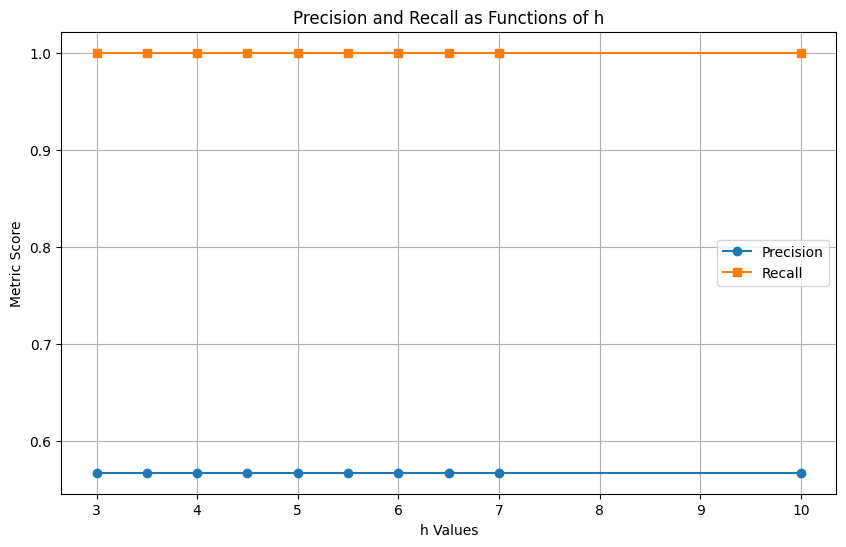

In [22]:
from sklearn.metrics import precision_score, recall_score

def is_out_of_control(S_neg, S_pos, h):
    """
    Determines if the control chart is out of control and returns the index of the first value out of control.

    Parameters:
        S_neg (np.ndarray): Array representing the negative side of the control chart.
        S_pos (np.ndarray): Array representing the positive side of the control chart.
        h (float): Control limit threshold.

    Returns:
        tuple: (status, index)
            - status (int): 1 if out of control, 0 otherwise.
            - index (int or None): The index of the first value out of control, or None if in control.
    """
    # Check for the first value out of control in S_neg
    neg_out_of_control = np.where(S_neg < -h)[0]
    if len(neg_out_of_control) > 0:
        # print(len(S_neg), neg_out_of_control[0], 1)
        return 1, len(S_neg) - neg_out_of_control[0] + 1

    # Check for the first value out of control in S_pos
    pos_out_of_control = np.where(S_pos > h)[0]
    if len(pos_out_of_control) > 0:
        return 1, len(S_pos) - pos_out_of_control[0] + 1

    # If no values are out of control, return 0 and None
    return 0, None

h_values = [3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10]
preds = {}
notices = []

truth = [0]*len(S_neg_healthy_charts) + [1]*len(S_neg_faulty_charts)
print(len(S_neg_healthy_charts), len(S_neg_faulty_charts))

precision_list = []
recall_list = []

for h in h_values:
    print(f"\n----- {h} -----")
    preds[h] = []

    for S_neg, S_pos in zip(S_neg_healthy_charts, S_pos_healthy_charts):
        out_of_control, _ = is_out_of_control(S_neg, S_pos, h)
        preds[h].append(out_of_control)

    # print(preds[h])
    
    for S_neg, S_pos in zip(S_neg_faulty_charts, S_pos_faulty_charts):
        out_of_control, notice = is_out_of_control(S_neg, S_pos, h)
        if notice: notices.append(notice)
        preds[h].append(out_of_control)

    # print(preds[h][len(S_neg_healthy_charts):])

    precision = precision_score(truth, preds[h])
    recall = recall_score(truth, preds[h])

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Mean notice (h): {np.mean(notices)/6}")

    precision_list.append(precision)
    recall_list.append(recall)

# Plot precision and recall
plt.figure(figsize=(10, 6))
plt.plot(h_values, precision_list, label="Precision", marker="o")
plt.plot(h_values, recall_list, label="Recall", marker="s")

plt.xlabel("h Values")
plt.ylabel("Metric Score")
plt.title("Precision and Recall as Functions of h")
plt.legend()
plt.grid(True)
plt.show()

In [179]:
def get_continuous_healthy_sequences(S_neg, S_pos, h, min_length=72*7):
    current_length = 0  # Current sequence length counter
    indices = []
    sizes = []

    for i, (neg, pos) in enumerate(zip(S_neg, S_pos)):
        # Check if both conditions are met for the current pair
        if neg > -h and pos < h:
            current_length += 1  # Increment current sequence length
        else:
            # If conditions break, check if the sequence met the minimum length
            if current_length >= min_length:
                indices.append(i-current_length)
                sizes.append(current_length)
            current_length = 0  # Reset current sequence length

    return pd.DataFrame({'index': indices, 'size': sizes})

H = 4
df_continuous_healthy_sequences = get_continuous_healthy_sequences(S_neg_healthy, S_pos_healthy, H)
date_times = [df_healthy.index[i] for i in df_continuous_healthy_sequences['index']]
df_continuous_healthy_sequences.index = date_times
print(len(df_continuous_healthy_sequences))
df_continuous_healthy_sequences

16


,index,size
2017-11-26 06:30:00,8925,560
2018-12-29 09:40:00,63328,646
2019-07-02 09:10:00,89673,674
2019-08-05 02:20:00,94474,537
2019-08-29 05:20:00,97929,528
2019-10-19 05:30:00,105226,577
2019-12-08 09:30:00,112219,1150
2020-01-12 22:20:00,117273,784
2020-03-06 01:40:00,124743,715
2020-03-27 02:30:00,127721,591


In [180]:
df_continuous_healthy_sequences['size'].sum()

10511

In [181]:
file_path = f'df_continuous_healthy_sequences_h{H}.xlsx'
df_continuous_healthy_sequences.to_excel(file_path, index=True)

In [83]:
X_pre_faults, X_not_pre_faults, y_pre_faults, y_not_pre_faults, _ = create_design_matrix(df_pre_faults, df_not_pre_faults, FEATURES, OUTPUT_FEATURE)

X_healthy = df_healthy[FEATURES].to_numpy()
X_pre_faults, y_pre_faults = df_pre_faults[FEATURES].to_numpy(), df_pre_faults[OUTPUT_FEATURE].to_numpy()
X_not_pre_faults, y_not_pre_faults = df_not_pre_faults[FEATURES].to_numpy(), df_not_pre_faults[OUTPUT_FEATURE].to_numpy()

# Scale input data to facilitate training
scaler = StandardScaler()
scaler.fit(X_healthy)
X_pre_faults = scaler.transform(X_pre_faults)
X_not_pre_faults = scaler.transform(X_not_pre_faults)

checkpoint_path = 'saved_models/mlp_large_finetuned.keras'

mlp_large_finetuned = create_model_mlp_gaussian_large(X_pre_faults, MODELS_SEED)
mlp_large_finetuned.summary()
mlp_large_finetuned.load_weights(checkpoint_path)
evaluation = mlp_large_finetuned.evaluate(X_pre_faults, y_pre_faults)
evaluation = mlp_large_finetuned.evaluate(X_not_pre_faults, y_not_pre_faults)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense (Dense)               (None, 300)               10500     
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
 distribution_lambda (Distr  ((None, 1),               0         
 ibutionLambda)               (None, 1))                         
                                                             

In [86]:
y_pred_pre_faults = np.array(mlp_large_finetuned(X_pre_faults).mean()).ravel()
y_stddevs_pre_faults = np.array(mlp_large_finetuned(X_pre_faults).stddev()).ravel()

y_pred_not_pre_faults = np.array(mlp_large_finetuned(X_not_pre_faults).mean()).ravel()
y_stddevs_not_pre_faults = np.array(mlp_large_finetuned(X_not_pre_faults).stddev()).ravel()

for y, y_pred, y_stddevs, name in [(y_pre_faults, y_pred_pre_faults, y_stddevs_pre_faults, "Pre-Faults"), (y_not_pre_faults, y_pred_not_pre_faults, y_stddevs_not_pre_faults, "Healthy")]:
    print(f"\n{name}\n")
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)    

    train_percentage_within_interval, _ = calc_percentages_in_interval(y, y, y_pred, y_pred, y_stddevs, y_stddevs, 0.99)
    train_percentage_within_interval2, _ = calc_percentages_in_interval(y, y, y_pred, y_pred, y_stddevs, y_stddevs, 0.95)

    # Print metrics
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")

    print(f"Percentage of Data Points within {0.99*100:.2f}% CI: " +
            (f"{train_percentage_within_interval}%" if isinstance(train_percentage_within_interval, str) else f"{train_percentage_within_interval:.2f}%"))
    print(f"Percentage of Data Points within {0.95*100:.2f}% CI: " +
            (f"{train_percentage_within_interval2}%" if isinstance(train_percentage_within_interval2, str) else f"{train_percentage_within_interval2:.2f}%"))


Pre-Faults

RMSE: 26.726
MAE: 15.764
Percentage of Data Points within 99.00% CI: 98.53%
Percentage of Data Points within 95.00% CI: 94.04%

Healthy

RMSE: 22.314
MAE: 11.979
Percentage of Data Points within 99.00% CI: 98.53%
Percentage of Data Points within 95.00% CI: 94.62%


In [89]:
target=0
k=0.5
h=5

lim = 200_000

normalized_residuals = (y_pre_faults - y_pred_pre_faults) / y_stddevs_pre_faults
y, y_pred, y_stddevs = y_pre_faults, y_pred_pre_faults, y_stddevs_pre_faults


# normalized_residuals = (y_not_pre_faults - y_pred_not_pre_faults) / y_stddevs_not_pre_faults
# y, y_pred, y_stddevs = y_not_pre_faults, y_pred_not_pre_faults, y_stddevs_not_pre_faults

S_pos = [0]
S_neg = [0]
count = 0

# Two-sided CUSUM test
for i in range(1, len(normalized_residuals)):
    S_pos.append(max(0, S_pos[i-1] + normalized_residuals[i] - target - k))
    S_neg.append(min(0, S_neg[i-1] + normalized_residuals[i] - target + k))
    # if i < lim: print(i, normalized_residuals[i], y_stddevs_all[i], y_all[i], y_pred_all[i], S_neg[i], S_pos[i])
    if abs(normalized_residuals[i]) > 5 and y_stddevs[i] > 0.1:
        count += 1
        print(i, normalized_residuals[i], y_stddevs[i], y[i], y_pred[i], S_neg[i], S_pos[i])

S_pos = np.array(S_pos[:lim])
S_neg = np.array(S_neg[:lim])

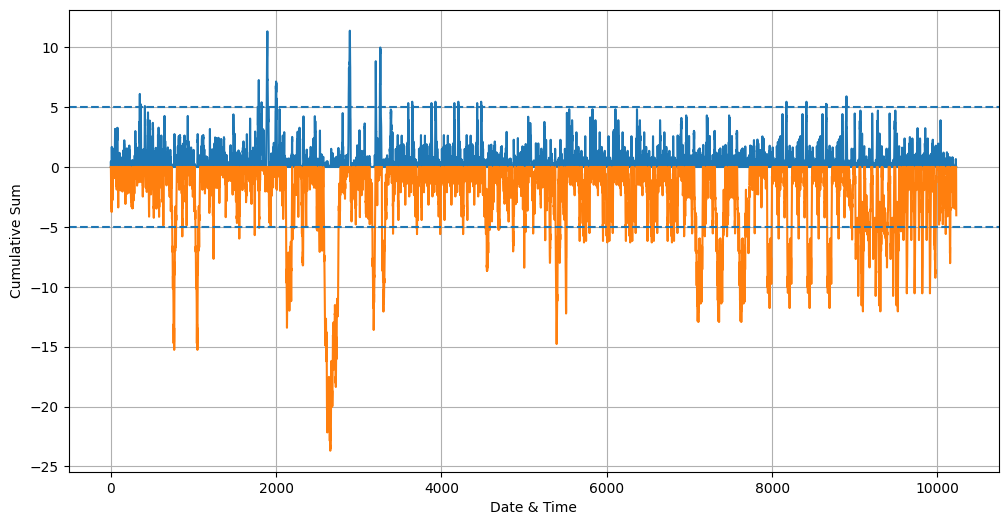

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(S_pos, label='S' + '\u2095')
plt.plot(S_neg, label='S' + '\u2097')
plt.axhline(y=h, linestyle='--', label='-I')
plt.axhline(y=-h, linestyle='--', label='I')
plt.xlabel('Date & Time')
plt.ylabel('Cumulative Sum')
plt.grid(True)

In [12]:
# Load Model

X_healthy, X_all, y_healthy, y_all, scaler_healthy = create_design_matrix(df_healthy, df_all, FEATURES, OUTPUT_FEATURE)

checkpoint_path = 'saved_models/mlp_large_finetuned.keras'

mlp_large_finetuned = create_model_mlp_gaussian_large(X_all, MODELS_SEED)
mlp_large_finetuned.summary()
mlp_large_finetuned.load_weights(checkpoint_path)
evaluation = mlp_large_finetuned.evaluate(X_healthy, y_healthy)
evaluation = mlp_large_finetuned.evaluate(X_all, y_all)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense (Dense)               (None, 300)               10500     
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
 distribution_lambda (Distr  ((None, 1),               0         
 ibutionLambda)               (None, 1))                         
                                                             

In [13]:
y_pred_all = np.array(mlp_large_finetuned(X_all).mean()).ravel()
y_stddevs_all = np.array(mlp_large_finetuned(X_all).stddev()).ravel()

y_pred_healthy = np.array(mlp_large_finetuned(X_healthy).mean()).ravel()
y_stddevs_healthy = np.array(mlp_large_finetuned(X_healthy).stddev()).ravel()

for y, y_pred, y_stddevs in [(y_all, y_pred_all, y_stddevs_all), (y_healthy, y_pred_healthy, y_stddevs_healthy)]:
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)    

    train_percentage_within_interval, _ = calc_percentages_in_interval(y, y, y_pred, y_pred, y_stddevs, y_stddevs, 0.99)
    train_percentage_within_interval2, _ = calc_percentages_in_interval(y, y, y_pred, y_pred, y_stddevs, y_stddevs, 0.95)

    # Print metrics
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")

    print(f"Percentage of Data Points within {0.99*100:.2f}% CI: " +
            (f"{train_percentage_within_interval}%" if isinstance(train_percentage_within_interval, str) else f"{train_percentage_within_interval:.2f}%"))
    print(f"Percentage of Data Points within {0.95*100:.2f}% CI: " +
            (f"{train_percentage_within_interval2}%" if isinstance(train_percentage_within_interval2, str) else f"{train_percentage_within_interval2:.2f}%"))

RMSE: 31.112
MAE: 12.941
Percentage of Data Points within 99.00% CI: 97.53%
Percentage of Data Points within 95.00% CI: 93.60%
RMSE: 22.422
MAE: 12.076
Percentage of Data Points within 99.00% CI: 98.54%
Percentage of Data Points within 95.00% CI: 94.62%


In [21]:
(len(normalized_residuals) - ((normalized_residuals > 1.96) | (normalized_residuals < -1.96)).sum())/len(normalized_residuals)

0.9461931239142258

In [19]:
(normalized_residuals < -2).sum()

5907

In [ ]:
normalized_residuals.max()

247250.32155473545

In [ ]:
max_index = np.argmax(normalized_residuals)

# Retrieve the values at this index
y_all_max = y_all[max_index]
y_pred_all_max = y_pred_all[max_index]
y_stddevs_all_max = y_stddevs_all[max_index]
print(y_all_max, y_pred_all_max, y_stddevs_all_max)

1417.1415395021454 1144.6776 0.001101976


In [67]:
target=0
k=0.5
h=5

lim = 200_000

# normalized_residuals = (y_all - y_pred_all) / y_stddevs_all
normalized_residuals = (y_healthy - y_pred_healthy) / y_stddevs_healthy
y = y_healthy
y_pred = y_pred_healthy
y_stddevs = y_stddevs_healthy

S_pos = [0]
S_neg = [0]
count = 0

# Two-sided CUSUM test
for i in range(1, len(normalized_residuals)):
    S_pos.append(max(0, S_pos[i-1] + normalized_residuals[i] - target - k))
    S_neg.append(min(0, S_neg[i-1] + normalized_residuals[i] - target + k))
    # if i < lim: print(i, normalized_residuals[i], y_stddevs_all[i], y_all[i], y_pred_all[i], S_neg[i], S_pos[i])
    if abs(normalized_residuals[i]) > 5 and y_stddevs[i] > 0.1:
        count += 1
        print(i, normalized_residuals[i], y_stddevs[i], y[i], y_pred[i], S_neg[i], S_pos[i])
    # if S_neg[i-1] < -h or S_pos[i-1] > h:
    #     print(i-1, normalized_residuals[i-1], y_stddevs_all[i-1], y_all[i-1], y_pred_all[i-1], S_neg[i-1], S_pos[i-1])
    #     count += 1
    #     S_pos.append(max(0, normalized_residuals[i] - target - k))
    #     S_neg.append(min(0, normalized_residuals[i] - target + k))

S_pos = np.array(S_pos[:lim])
S_neg = np.array(S_neg[:lim])

3812 -5.495142655756524 18.422653 1937.08471679688 2038.3198 -16.595893479356654 0
18573 -6.960763799698833 0.443553 -4.36936521530151 -1.2818975 -6.462511592591569 0
21808 5.97350462923004 15.5448 1300.21166992188 1207.3547 0 5.47350462923004
25417 -6.244530988679857 0.25936386 -2.78326940536499 -1.1636637 -8.836987984440238 0
26018 -5.136779142386031 1.7833143 102.060249328613 111.22074 -5.1517863232649574 0
31563 -6.690213188640148 0.1747387 -1.98835444450378 -0.81931525 -6.190213188640148 0
35964 8.164977800428705 4.5508757 78.1706390380859 41.01284 0 7.664977800428705
42027 6.0928095962645985 7.494982 202.885971069336 157.22047 0 11.37313883950586
42211 6.6550547006377 0.95969987 3.7428092956543 -2.6440458 0 8.668220760843521
42254 -5.241022743741381 0.33190447 -2.74539661407471 -1.0058777 -4.741022743741381 0
43112 5.037508870110006 1.5174805 5.48676490783691 -2.1575565 0 18.907060505483777
45308 5.519028677139929 4.8386173 311.995513916016 285.29105 -0.8541179913030286 5.0190286

In [68]:
count

54

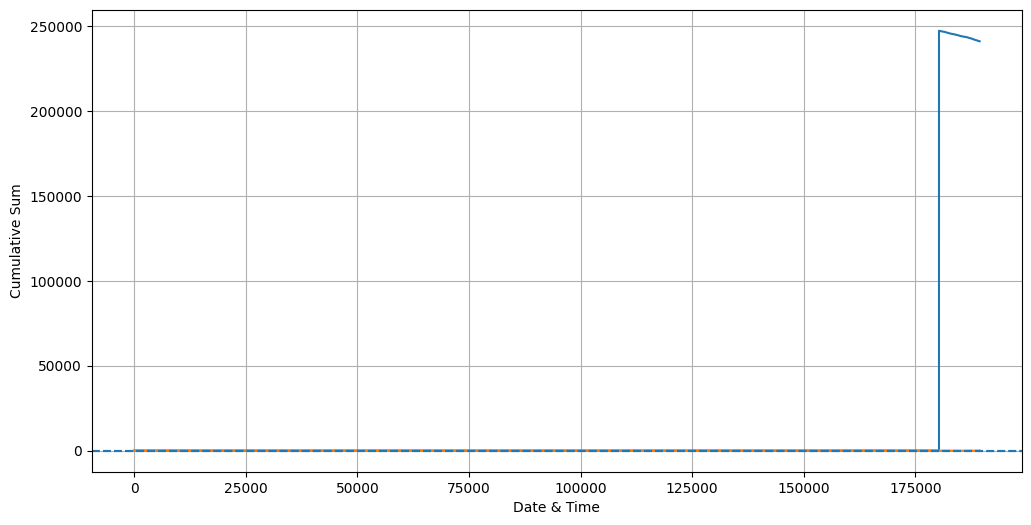

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(S_pos, label='S' + '\u2095')
plt.plot(S_neg, label='S' + '\u2097')
plt.axhline(y=h, linestyle='--', label='-I')
plt.axhline(y=-h, linestyle='--', label='I')
plt.xlabel('Date & Time')
plt.ylabel('Cumulative Sum')
plt.grid(True)

In [103]:
len(S_pos)

189381

In [107]:
print((S_pos > h).sum())
print((S_neg < -h).sum())

9105
5


In [106]:
for i in range(500, 1000):
    print(S_neg[i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
